Model to determine chance of youth getting in trouble at school (p6b39) given...
- whether or not they feel safe at school (k6b1d)
- youth's living arrangements (cp6yloth)
- headaches (p6b16)
- primary caregiver's education (cp6edu)
- days per week they eat with the family (k6c3)

also consider predicting closeness to bio parents
- father(k6c28)
- mother (k6c17)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def corr (x, y):
    print(x+' and '+y+' are corr by '+str(df[x+'_int'].corr(df[y+'_int'])))

df_1=pd.merge(pd.read_csv("FF_Processed_Data_a.csv"),(pd.read_csv("FF_Processed_Data_b.csv")),on='idnum')
print('pair 1...')
df_2=pd.merge((pd.read_csv("FF_Processed_Data_c.csv")),(pd.read_csv("FF_Processed_Data_d.csv")),on='idnum')
print('pair 2...')
df_3=pd.merge(df_1,df_2,on='idnum')
print('pair 3...')
df_4=pd.merge(df_3,(pd.read_csv("FF_Processed_Data_e.csv")),on='idnum')
print('almost...')

df=df_4=pd.merge(df_4,(pd.read_csv("FF_Processed_Data_addi.csv")),on='idnum')
print('Done!')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pair 1...
pair 2...
pair 3...
almost...
Done!


In [3]:
cf=df[['p6b39_int', 'k6c28_int', 'k6c17_int', 'k6b1d_int', 'k6c3_int', 'p6b16_int', 'cp6edu_int']]
cf=cf.dropna()
cf.k6b1d_int=(4-cf.k6b1d_int)/3
cf.cp6edu_int=(4-cf.cp6edu_int)/3
cf.k6c3_int=cf.k6c3_int/7
cf.p6b16_int=2-cf.p6b16_int

cf.p6b39_int=2-cf.p6b39_int
cf.k6c17_int=(4-cf.k6c17_int)/3
cf.k6c28_int=(4-cf.k6c28_int)/3

cf

p6b39_int  k6c28_int  k6c17_int  k6b1d_int  k6c3_int  p6b16_int  \
0          1.0   1.000000   1.000000   1.000000  1.000000        1.0   
1          1.0   1.000000   1.000000   1.000000  0.428571        0.0   
2          1.0   0.000000   0.000000   1.000000  0.714286        0.0   
5          0.0   0.000000   1.000000   1.000000  1.000000        0.0   
6          0.0   0.000000   0.000000   1.000000  0.000000        0.0   
7          1.0   1.000000   1.000000   1.000000  1.000000        0.0   
8          0.0   0.666667   1.000000   1.000000  0.714286        0.0   
9          1.0   0.333333   1.000000   1.000000  0.285714        0.0   
10         1.0   0.000000   0.666667   1.000000  1.000000        0.0   
12         1.0   0.666667   1.000000   1.000000  0.428571        1.0   
13         1.0   0.000000   1.000000   1.000000  0.285714        0.0   
14         0.0   1.000000   0.333333   0.333333  0.000000        0.0   
16         1.0   1.000000   1.000000   1.000000  1.000000        1.0   
19         1.0   0.333333   1.000000   0.666667  0.857143        0.0   
20         0.0   0.333333   0.666667   1.000000  1.000000        0.0   
21         1.0   0.000000   0.666667   0.000000  1.000000        0.0   
22         1.0   0.000000   0.000000   1.000000  1.000000        0.0   
24         1.0   1.000000   0.000000   1.000000  1.000000        0.0   
28         1.0   0.333333   1.000000   0.666667  0.428571        0.0   
29         1.0   0.333333   1.000000   1.000000  0.285714        0.0   
30         1.0   1.000000   0.666667   1.000000  1.000000        0.0   
31         0.0   0.666667   1.000000   0.666667  0.428571        0.0   
32         0.0   0.333333   0.666667   1.000000  1.000000        0.0   
34         1.0   0.000000   1.000000   1.000000  1.000000        0.0   
35         1.0   0.333333   1.000000   1.000000  1.000000        0.0   
37         1.0   0.333333   1.000000   1.000000  1.000000        0.0   
38         0.0   1.000000   0.333333   1.000000  0.000000        0.0   
39         1.0   0.333333   1.000000   1.000000  0.714286        0.0   
41         1.0   0.666667   0.666667   0.666667  0.428571        0.0   
43         1.0   1.000000   1.000000   0.666667  0.857143        0.0   
..         ...        ...        ...        ...       ...        ...   
293        1.0   0.333333   1.000000   0.666667  1.000000        0.0   
294        1.0   1.000000   1.000000   1.000000  1.000000        0.0   
295        1.0   0.666667   0.333333   0.666667  1.000000        0.0   
296        1.0   0.000000   0.666667   1.000000  0.857143        0.0   
297        1.0   0.666667   1.000000   0.666667  0.714286        0.0   
299        1.0   0.666667   0.000000   1.000000  0.285714        0.0   
300        1.0   1.000000   1.000000   1.000000  1.000000        0.0   
301        1.0   0.000000   1.000000   1.000000  1.000000        0.0   
303        1.0   0.666667   1.000000   1.000000  0.142857        0.0   
304        1.0   1.000000   1.000000   0.666667  0.714286        0.0   
305        1.0   1.000000   0.666667   1.000000  0.285714        0.0   
306        0.0   0.666667   0.000000   0.666667  1.000000        0.0   
307        1.0   1.000000   0.666667   0.666667  0.571429        0.0   
308        1.0   0.333333   1.000000   1.000000  1.000000        0.0   
309        1.0   0.333333   1.000000   1.000000  0.714286        0.0   
310        1.0   0.666667   0.666667   0.000000  0.000000        0.0   
311        0.0   1.000000   0.000000   0.666667  1.000000        0.0   
312        1.0   0.666667   1.000000   0.666667  0.428571        0.0   
313        1.0   1.000000   1.000000   1.000000  1.000000        1.0   
314        1.0   1.000000   1.000000   1.000000  1.000000        1.0   
315        1.0   0.666667   0.666667   1.000000  0.857143        0.0   
316        1.0   0.000000   1.000000   1.000000  1.000000        0.0   
317        0.0   0.000000   0.666667   1.000000  0.285714        0.0   
318        1.0   0.000000   1.000000   1.0000

In [4]:
school_labels=list(cf.pop('p6b39_int'))
dad_labels=list(cf.pop('k6c28_int'))
mom_labels=list(cf.pop('k6c17_int'))

answers=[(school_labels[x], dad_labels[x], mom_labels[x]) for x in range(len(school_labels))]

In [47]:
model = keras.Sequential([
    layers.Dense(24, activation=tf.nn.relu, input_shape=[len(cf.keys())]),
    layers.Dense(24, activation=tf.nn.relu),
    layers.Dense(3, activation=tf.nn.sigmoid)
  ])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])

In [55]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  cf, np.array(answers),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

print('Done!')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

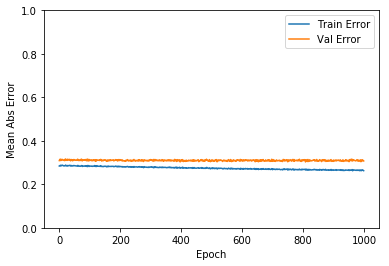

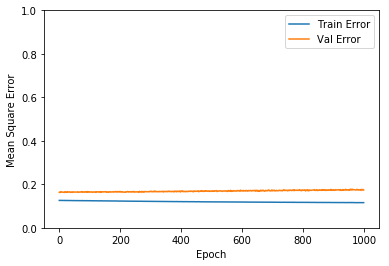

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
               label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
        label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(history)

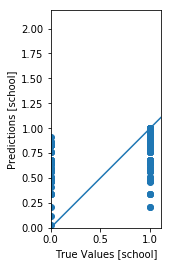

In [57]:
test_predictions = model.predict(cf)

plt.scatter([x[0] for x in answers], [x[0] for x in test_predictions])
plt.xlabel('True Values [school]')
plt.ylabel('Predictions [school]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

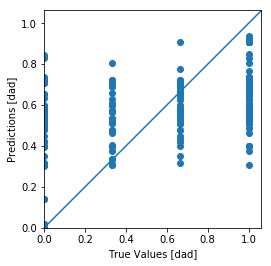

In [58]:
test_predictions = model.predict(cf)

plt.scatter([x[1] for x in answers], [x[1] for x in test_predictions])
plt.xlabel('True Values [dad]')
plt.ylabel('Predictions [dad]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

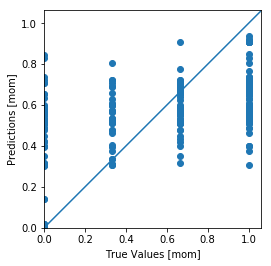

In [59]:
test_predictions = model.predict(cf)

plt.scatter([x[1] for x in answers], [x[1] for x in test_predictions])
plt.xlabel('True Values [mom]')
plt.ylabel('Predictions [mom]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

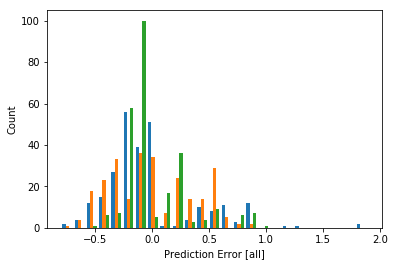

In [60]:
error = test_predictions - answers
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [all]")
_ = plt.ylabel("Count")

In [68]:
model.save('basic_tf_model.h5')

In [15]:
# a=feeling of safety at school (0 to 1)
# b=probability of dinner with family (0 to 1) also seen as nights per week divided by 7
# c=headaches frequently 0 no and 1 yes
# d=level of parent's education from less than HS (0) to college/graduate (1)

def predict(a,b,c,d):
    pred=np.reshape([a,b,c,d], (1,4))
    ans=(model.predict(pred))[0]
    school=100*(1-ans[0])
    school=round(school,3)
    dad=round(ans[1],3)
    mom=round(ans[2],3)
    print(str(school)+'% chance of misbehaving in school, '+str(dad)+' of 1 closeness to father, and '+str(mom)+' of 1 closeness to mother.')

In [82]:
predict(0.5,0.8,0,0.8)
predict(1,1,0,0.2)
predict(0.7,1,0.4,1)
print('')
predict(0.6,0,1,0.6)
predict(0,1,0.5,0.9)
predict(1,0.5,0,0)

49.46% chance of misbehaving in school, 0.519 of 1 closeness to father, and 0.832 of 1 closeness to mother.
12.892% chance of misbehaving in school, 0.482 of 1 closeness to father, and 0.838 of 1 closeness to mother.
9.913% chance of misbehaving in school, 0.724 of 1 closeness to father, and 0.817 of 1 closeness to mother.

0.011% chance of misbehaving in school, 0.727 of 1 closeness to father, and 0.578 of 1 closeness to mother.
0.003% chance of misbehaving in school, 0.038 of 1 closeness to father, and 0.951 of 1 closeness to mother.
28.218% chance of misbehaving in school, 0.491 of 1 closeness to father, and 0.889 of 1 closeness to mother.


In [80]:
def avg(l):
    return sum(l)/len(l)

school_chance=[]
dad_chance=[]
mom_chance=[]
for x in test_predictions:
    school_chance.append(x[0])
    dad_chance.append(x[1])
    mom_chance.append(x[2])
print('Average scores are {0} for school, {1} for dad, and {2} for mom.'.format(avg(school_chance), avg(dad_chance), avg(mom_chance)))

Average scores are 0.7563469107334431 for school, 0.5643672310389005 for dad, and 0.8249631222624045 for mom.


This model has far more variation than the simple math model using averages, which is good, but it unfortunately also has many accuracy issues. Still, the model uses more complexities (for example, optimal feeling of safety at school for misbehavior is 0.75, not 1 or 0) but it is far from perfect.